<a href="https://colab.research.google.com/github/jerrycyng/Customer-Behaviour-Prediction-with-Machine-Learning-and-SHAP-Interpretation/blob/main/Customer_Behaviour_Prediction_with_Machine_Learning_and_SHAP_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import xgboost
import matplotlib.pyplot as plt

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 5.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491654 sha256=5633601f4b801e1b0a5f44c3a80d8d2ba39fea0b426322dc63df51ec29280474
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/Bank.csv"
df_bank= pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df_bank= df_bank.drop(columns= 'Unnamed: 0')
df_bank= df_bank.drop(columns= 'Unnamed: 21')

In [ ]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
print(df_bank.shape)
df_bank.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [ ]:
newcols = []
for col in list(df_bank.columns):
    if col not in ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
        newcols.append(col)
newcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
df_bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df_bank = df_bank.dropna()
# import LabelEncoder from sklearn preprocessing sub module
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the categorical variable origin
cols = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']
for col in cols:
    df_bank[col] = le.fit_transform(df_bank[col])

In [ ]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# extract all the independent variables from the dataset except the variable - name
features = df_bank.drop(['y'], axis = 1)

# extract the target variable - df_bank
target = df_bank['y']

In [ ]:
# import train_test_split from sklearn model_selection sub module
from sklearn.model_selection import train_test_split

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 31)

#d_train = xgboost.DMatrix(X_train, label=y_train)
#d_test = xgboost.DMatrix(X_test, label=y_test)

## Model Building

In the following, we are going to use a function called GridSearchCV to perform hypertuning of machine learning model and find the optimal parameters for our model. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost
clf_temp= xgboost.XGBClassifier().fit(X_train, y_train)
param_grid = { 
    'colsample_bytree':[.75,1],
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'max_depth':[1,2,3,5],
    'subsample':[.75,1],
    'n_estimators': list(range(50, 400, 50))
}
grid_search = GridSearchCV(estimator=clf_temp, scoring='roc_auc', param_grid=param_grid)
grid_result = grid_search.fit(X_train, y_train)
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}','\n')

These are the optimal parameters for the model. In the below, we are going to train the model by these parameters. 

In [ ]:
clf= xgboost.XGBClassifier(base_score= np.mean(y_train),subsample= 0.75,objective='binary:logistic', max_depth= 5,colsample_bylevel= 0.75,n_estimators=250, eta= 0.05).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(d_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# # return the accuracy on the train data
# clf.score(X_train, y_train)
# # return the accuracy on the test data
# clf.score(X_test, y_test)

In [ ]:
y_test.hist()

# Model explainability

In [ ]:
import shap
# intialize the shap
shap.initjs()

In [ ]:
# use shap Explainer and pass the best estimator and the test features
explainer = shap.TreeExplainer(clf, X_test)
# pass the test features into the above explainer to compute shap values
shap_values = explainer(X_test)

In [ ]:
np.mean(clf.predict(d_test))

In [ ]:
explainer.expected_value

## Shap Feature Importance: Global Importance

In [ ]:
# create shap bar plot
shap.plots.bar(shap_values)

## SHAP Summary Plot
In 3 dimension, x axis by SHAP value, colored by feature values.

In [ ]:
# create shap summary plot
shap.summary_plot(explainer.shap_values(X_test), X_test)

In [ ]:
#explainer.shap_values(X_test)

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(list(df_shap))
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    

    
ABS_SHAP(explainer.shap_values(X_test),X_test) 

## Shap Feature Importance: Local Importance

In [ ]:
# create shap bar plot for only one observation
shap.plots.bar(shap_values[0])

## SHAP Waterfall

In [ ]:
#discussion for log odd transform scale, https://github.com/slundberg/shap/issues/29
def xgb_shap_transform_scale(original_shap_values, Y_pred, which):
    from scipy.special import expit
    
    #Compute the transformed base value, which consists in applying the logit function to the base value
    from scipy.special import expit #Importing the logit function for the base value transformation
    untransformed_base_value = original_shap_values.base_values[-1]
   
    #Computing the original_explanation_distance to construct the distance_coefficient later on
    original_explanation_distance = np.sum(original_shap_values.values, axis=1)[which]
    
    base_value = expit(untransformed_base_value ) # = 1 / (1+ np.exp(-untransformed_base_value))

    #Computing the distance between the model_prediction and the transformed base_value
    distance_to_explain = Y_pred[which] - base_value

    #The distance_coefficient is the ratio between both distances which will be used later on
    distance_coefficient = original_explanation_distance / distance_to_explain

    #Transforming the original shapley values to the new scale
    shap_values_transformed = original_shap_values / distance_coefficient

    #Finally resetting the base_value as it does not need to be transformed
    shap_values_transformed.base_values = np.full(original_shap_values.base_values.shape, base_value)
    shap_values_transformed.data = original_shap_values.data
    
    #Now returning the transformed array
    return shap_values_transformed

In [ ]:
# create an waterfall plot for only one observation
shap_values_transformed = xgb_shap_transform_scale(shap_values, y_pred[:500], 253)
shap.plots.waterfall(shap_values_transformed[1])
#log(p/p-1)

In [ ]:
# create an waterfall plot for only one observation (Altered)
shap_values_transformed = xgb_shap_transform_scale(shap_values, y_pred, 253)
shap.plots.waterfall(shap_values_transformed[1])
#log(p/p-1)

## SHAP Force Plot
It helps to visualize the given SHAP values with an additive force layout.

In [ ]:
# create force plot for the 1st observation
shap.initjs()
shap.force_plot(shap_values[0,:], X_train.iloc[0,:], link='logit')

In [ ]:
# create force plot for the 2nd observation
shap.initjs()
shap.force_plot(shap_values[1,:], X_train.iloc[1,:], link='logit')

In [ ]:
# create force plot for the 3rd observation
shap.initjs()
shap.force_plot(shap_values[253,:], X_train.iloc[2,:], link='logit')

In [ ]:
# create force plot for the 3rd observation
shap.initjs()
shap.force_plot(shap_values[2,:], X_train.iloc[2,:], link='logit')

In [ ]:
features

In [ ]:
X_test

# Depedence Plot

In [ ]:
s_value = explainer.shap_values(X_test)

In [ ]:
shap.dependence_plot('age', s_value, X_test, interaction_index=None)

In [ ]:
shap.dependence_plot('age', s_value, X_test)

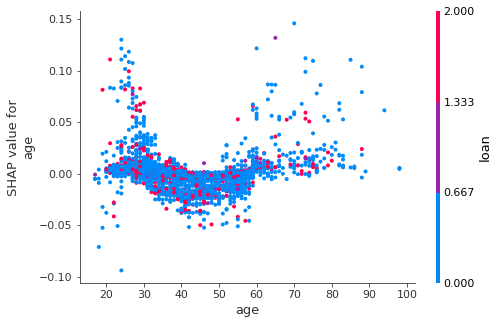

In [ ]:
shap.dependence_plot('age', s_value, X_test, interaction_index="loan")